# Introduction to Dimensionality Reduction and Empirical Application

### A Project by Marc Lipfert, Matriculation Number: 3220513

### Computational Statistics (Summer Semester 2020)

## Table of Contents

[1.) Introduction](#introduction)

2.) Dimensionality Reduction Using Principal Component Analysis (PCA)

3.) Outline of the Empirical Setting

4.) Comparison of PCA and Factor Analysis

5.) Simulation Study

6.) Empirical Application to Actual Survey Data

7.) Conclusion

<a id='introduction'></a>
## 1.) Introduction

<a id='pca'></a>
## 2.) Dimensionality Reduction Using Principal Component Analysis (PCA)

This section aims to introduce Principal Component Analysis (PCA) and thereby intends to answer the following questions: In which contexts is PCA a useful tool? And what are its properties and how is it conducted? 

*(a) In which contexts is PCA a useful tool?*

PCA is essentially a dimensionality reduction method. In the case of a data set with many variables ("high dimensionality"), an empirical model based on an extensive set of variables is usually difficult to interpret. Further, the predictive performance of such a model may be poor due to overfitting. Therefore, the aim is often to create a small(er) set of new variables which captures most of the statistical information contained in the original variables. PCA intends to achieve exactly this, where those newly generated variables are called *Principal Components* and are linear combinations of the original variables. 

To illustrate in more detail what this means and why it is done, it is useful to fix ideas and draw on a formal framework. The set-up is intended to resemble a situation that is frequently encountered in microeconometrics. Assume that a survey is conducted among randomly selected individuals. The sample size is $N$ and the econometrician is interested in the relationship between the outcome $Y$ and a set of $P$ explanatory variables $X_1 , \ldots , X_P$. The empirical model (structural equation) for an indivdidual $i$ is assumed to be as follows:

$$ Y_i = \beta_0 + \beta_1 X_{1i} + \ldots + \beta_P X_{Pi} + \epsilon_i \text{,} $$

where $\epsilon$ denotes an error term that is assumed to have a conditional expectation of zero: $E[\epsilon | X] = 0$. Using matrix notation, $ \pmb Y$ and $\pmb \epsilon$ denote column vectors each of length $N$ and $\pmb X$ is a $N \times (P + 1)$ matrix. Then, the re-written structural equation reads: 

$$ Y = \pmb X \beta + \epsilon \text{ , where } \pmb X = \begin{pmatrix} 1 & X_{11} & X_{21} & \dots & X_{P1} \\
1 & X_{12} & X_{22} & \dots & X_{P2} \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & X_{1N} & X_{2N} & \dots & X_{PN} \end{pmatrix} $$. 

The task of the econometrician is to find estimates $\hat{\beta}$ of the population parameters $\beta$, usually obtained by minimizing the sum of squared residuals (i.e. OLS).  

There are two problems that go along with high dimensional data, i.e. large $P$. First, when $N$ is only slightly larger than $P$, *overfitting* is likely to occur. In such a setting with a large number of explanatory variables relative to the sample size, the estimated coefficients of the explanatory variables might pick up on random noise rather than capturing the ("true") structural parameters. This can be viewed as an instance of the bias-variance trade-off: given standard assumptions, the numerous estimated coefficients would be unbiased but the variance of the obtained predictions would be large and thus highly dependent on the random sample that the model is fit on. Put differently, the estimated function $\hat{f}$ with coefficients $ \hat{\beta}$ would yield poor predictions (or respectively, high prediction errors) when being applied to a different random sample of the population ("test data set").

The second issue in the context of high dimensional data is the limited interpretability. Given the large number of explantory variables, a meaningful interpretation of the model may no longer be feasible. One might be inclined to interpret the estimated coefficients separately - but since high dimensionality can go along with large correlations among the explanatory variables, the issue of multicollinearity may render this approach useless as it cannot be pinned down which variable is truely predictive of the outcome.

Dimensionality reduction can be employed to address those two issues. Principal Component Analysis (PCA) is probably the most common method to achieve this. As already stated, it entails finding linear combinations of the explanatory variables that encapsulate as much of the statistical information ("variability") contained in the original variables as possible. The actual procedure is outlined in the following.

*(b) What are the properties of PCA and how is it conducted?*

To begin with, it is common practice to centre (or "demean") the explanatory variables, which is done as follows: 

$$ \tilde{x}_{ij} = x_{ij} - \bar{x}_j \text{,}$$

where $\bar{x}_j$ denotes the sample mean of the $j$th explanatory variable across the $N$ individuals. Importantly, this does not alter the solution besides centring it at zero. Note that when the units of measurement differ across the explanatory variables, e.g. height in cm and temperature in degree Celsius, it is advisable to go even further and standardise the variables to mean zero and standard deviation of 1. This is because of an undesirable feature that PCA has which is the sensitivity of the results to the units of measurement. A change in the units of measurement of a variable also affects its variance - and as the principal components are constructed such that they capture the greatest possible variability of the original variables, it follows that the principal components would change. This issue of standardisation will be picked up on in the following section.

We are then interested in obtaining linear combinations $Z_1, \dots, Z_M$ of the centred variables, where $M \leq P$. Those linear combinations are referred to as prinicpal components and they are ordered according to their variance in a descending fashion, thus the first principal component $Z_1$ is the linear combination of the centred explanatory variables,

$$ Z_1 = \phi_{11} \tilde{X}_1 + \phi_{12} \tilde{X}_2 + \dots + \phi_{1P} \tilde{X}_P = \sum_{j=1}^P \phi_{1j} \tilde{X}_j = \tilde{\pmb X} \phi_1 \, \text{ ,}$$

that yields the highest variance. The scalars $\phi_{11}, \phi_{12}, \dots, \phi_{1P}$ are referred to as *loadings* of the first principal component and $\phi_1$ denotes the corresponding column vector $\phi_1 = (\phi_{11} \, \phi_{12}  \, \dots \,  \phi_{1P})^T$. 

To derive the actual loadings of the first principal component, we have to note that any such linear combination has its variance given by $Var(\tilde{\pmb X} \phi)  = \phi^T \pmb S \phi$, where $\pmb S$ denotes the sample covariance matrix of the (centred) explanatory variables. Thus, the vector $\phi_1$ must be obtained, which maximises the quadratic form $\phi^T \pmb S \phi$. To ensure a well-defined solution to this problem, $\phi$ is required to be a unit-norm vector, i.e. $\phi^T \phi = 1$. Put together, the constrained maximisation problem can be written as 

$$\max_{\phi} \phi^T \pmb S \phi - \lambda (\phi^T \phi -1) \text{  .}$$

Solving this problem yields:

$$ \pmb S \phi - \lambda \phi = \pmb 0 \iff  \pmb S \phi = \lambda \phi \text{  .}$$

Thus, $\phi$ is an eigenvector of the covariance matrix $\pmb S$ and the scalar $\lambda$ denotes the corresponding eigenvalue. Since we are interested in the linear combination with the largest variance  $Z_1$, the respective loadings vector $\phi_1$ (i.e. the eigenvector) is identified by the largest eigenvalue $\lambda_1$ as 

$$ Var(\tilde{\pmb X} \phi)  = \phi^T \pmb S \phi = \lambda \phi^T \phi = \lambda \, \text{ ,}$$

using the solution of the maximisation problem. Note that this solution of the maximisation problem is unaffected if the eigenvectors $\phi$ is multiplied by (-1), so the actual signs of the loadings are meaningless - merely their respective magnitudes as well as their sign patterns matter. 

As $\pmb S$ is a symmetric $P \times P$ matrix, a total number of $P$ eigenvalues can be obtained. The corresponding eigenvectors $\phi_j$ with $j=1, \dots, P$ can be required to be orthogonal to each other, which is ensured when they satify $\phi_{j}^T \phi_{j\,'} = 1$ for $j=j\,'$ and zero otherwise. It can be shown that the remaining $2, \dots, P$ linear combinations can be found as solutions to the problem of successively maximizing the variance subject to the constraint of uncorrelatedness with previously obtained linear combinations.

In consequence, we are able to obtain $P$ linear combinations, i.e. principal components, of the $P$ centred explanatory variables - and all of these linear combinations are uncorrelated. Further, they are arranged in descending order according to their variance, which implies that the variablility of the original variables is more concentrated within the first couple of principal components. Dimensionality reduction now means that not all of the principal components are used (otherwise no dimensionality reduction would have been achieved) but instead only the principal components up to $M < P$ are utilised. In a regression framework, this implies conducting Principal Component Regression (PCR): instead of regressing the outcome variable $Y$ on the original explanatory variables $\pmb X$, we regress it on a number of principal components:

$$ Y_i = \gamma_0 + \gamma_1 Z_{1i} + \dots + \gamma_M Z_{Mi} \, \text{ ,}$$

The crucial assumption thereby is that the directions in which the (centred) original variables have the most variability are also the directions that are associated with the outcome variable $Y$. The word "direction" is used as the vectors of principal component loadings, $\phi$, characterise a direction in a multi-dimensional space. Given that this assumption holds, using only $M$ linear combinations that contain most of the original statistical information improves upon the overfitting problem if $M << P$. Referring back to the variance-bias trade-off, we accept that a small part of the original statistical information is not used (i.e. introducting bias) while achieving a reduction of the variance of our predictions when being applied to a new random sample (test data set) which is likely to overcompensate for the introduced bias.  Further, interpretatibility of the model is increased as only a lower number of variables is included - which are also uncorrelated, so multicollinearity is no longer an issue.

The questions remains, how many principal components should be included in the regression model. A helpful concept in this context is the *Proportion of Variance Explained* (PVE). As already stated, we intend to reduce the dimensionality of the data while preserving as much as possible of the original variability. So the PVE states how much of the total variance is captured by an individual principal component. As the explanatory variables are centred, the total variability is calculated as follows:

$$ \sum_{j=1}^{P} Var(\tilde{X}_j) = \sum_{j=1}^{P} \frac{1}{N}\sum_{i=1}^{N} \tilde{x}_{ji}^2 \text{ .}$$

Further, the variance attributable to the $m$th principal component is 

$$ \frac{1}{N} \sum_{i=1}^{N} z_{mi}^2 = \frac{1}{N} \sum_{i=1}^{N} (\sum_{j=1}^{P} \phi_{mj} \tilde{x}_{ji})^2 \text{ .}$$

Hence, the the proportion of total variance explained by the principal component $m$ is given by:

$$ \frac{\sum_{i=1}^{N} (\sum_{j=1}^{P} \phi_{mj} \tilde{x}_{ji})^2}{\sum_{j=1}^{P} \sum_{i=1}^{N} \tilde{x}_{ji}^2} \text{ .}$$

Each PVE of the individual principal components is a positive number that lies between 0 and 1. In order to obtain the *cumulative PVE* up to prinipal component $M$, this would simply be the sum over the PVE of components $1, \dots, M$. Both, the PVE and the cumulative are often visualized, where especially plotting the former against the number of principal components receives particular attention and is know as a "Scree Plot" (an example will be presented later).

To pin down the number of principal components to include in a PCR, a number of rather *ad-hoc* decision rules have been proposed. For instance, choosing only as many principal components as to explain a sizeable fraction of the total variance has been suggested. While it is of course context-dependent, which actual cut-off with respect to the cumulative PVE is appropriate, requiring the principal components to explain at least 70-90\% of the total variance can be seen as common practice (see Jolliffe, 112-113). A more visual approach would be to analyse the Scree Plot with the PVE on the y-axis and the number of principal components on the x-axis. By eyeballing one would identify the last principal component after which the PVE of the following ones drops off, which is sometimes referred to as an *elbow* (Hastie/Tibshirani, 384). A last example of those rather ad-hoc decision rules would be to keep those principal components with a corresponding eigenvalue $\lambda$ that is larger than the average eigenvalue $\bar{\lambda}$, or only larger than $0.7 \bar{\lambda}$ (Jolliffe, 115).

A more systematic and, as some would argue, more objective way to identify the number of principal components to include is to choose them via *Cross-Validation*. As already stated, our aim is to identify an empirical model which is able to explain $Y$ well. Thus, a well fitted model should be able to give good predictions of the outcome when being applied to different data that is likewise randomly drawn from the population. Overfitting is a potential issue which could lead to a situation in which the model is able to predict $Y$ well on a data set the model was trained on, but does poorly in predicting the outcome when using a test data set. One way to achieve good predictive performance on test data is to use Cross-Validation (CV). Then, the available data is randomly split into $k$ folds, commonly $k = 10$. Initially, the first fold is kept as a validation set, and the model is fit on the rest of the data, i.e. on the other $(k-1)$ folds. The quality of the estimated model $\hat{f}$ is evaluated on the held-out fold and the corresponding prediction error is calculated as the mean squared error (MSE). This procedure is repeated $k$ times, always keeping another fold as the validation set. The $k$-fold Cross-Validation estimate of the MSE is then simply the average of the obtained measures of the prediction errors: $MSE_1, \dots, MSE_k$. Referring back to the problem of selecting the appropriate number of principal components, the number would be chosen in order to achieve the lowest CV MSE.

## Lab 1
### Visualisation of the General Approach


The approach is best described when starting with low-dimensional data, such as $P = 2$, as this can easily be visualised. For this purpose, data is drawn from a bivariate normal distribution in which the data generating process features both variables to have differing variances. Further, they have a positive covariance. The centred data as well as the two principal components are presented in the following graph.

In [1]:
library(mvtnorm)
library(ggplot2)
library(gridExtra)
library(cowplot)

#adjust size of graphs
options(repr.plot.res = 80) 
# options(repr.plot.width=4, repr.plot.height=4.5)

Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'cowplot' was built under R version 3.6.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
prco <- function(X) {
    cov <- cov(X)
    p <- dim(cov)[1]
    
    pca <- eigen(cov)
    colnames(pca$vectors) <- paste("PC", 1:p, sep="")
    rownames(pca$vectors) <- paste("X", 1:p, sep="")
    
    PVE <- pca$values / sum(apply(X, 2, var))
    cPVE <- cumsum(PVE)
    importance <- round(rbind(pca$values, PVE, cPVE), 4)
    rownames(importance)[1] <- "Var (Eigenval.)"
    colnames(importance) <- paste("PC", 1:p, sep="")
    
    vars <- cbind(paste("PC", 1:p, sep=""), pca$values)
    colnames(vars) <- c("PC", "var")
    df_vars <- data.frame(vars)
    df_vars$var <- as.numeric(as.character(df_vars$var))
    
    return(list(values=pca$values, vectors=pca$vectors, df_vars = df_vars, importance=importance))
}

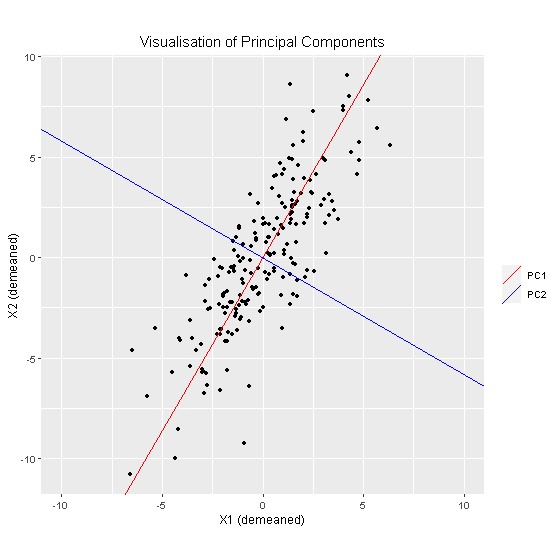

In [3]:
# Bivariate Normal Distribution

set.seed(1234)

N <- 200
sigma <- matrix(c(5, 6, 6, 12), byrow = T, nrow = 2)
mu <- c(5, 15)

X <- rmvnorm(N, mean = mu, sigma = sigma)
colnames(X) <- c("X1", "X2")
X_demeaned <- scale(X, center=T, scale = F)

df_demeaned <- as.data.frame(X_demeaned)

pca <- prco(X_demeaned)

p1 <-   ggplot(df_demeaned, aes(X1, X2)) + 
        xlim(-10, 10) +
        geom_point() + 
        geom_abline(aes(slope = pca$vectors[2, 1] / pca$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca$vectors[2, 2] / pca$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (demeaned)") + ylab("X2 (demeaned)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("Visualisation of Principal Components") +
        coord_fixed()
p1

The positive covariance of the data can be spotted as the point cloud has an upward slope. Since the first principal component is by definition the linear combination of the two variables which captures as much of their variability as possible, it also has a positive slope, thereby capturing the co-movement. The first principal component, depicted in the graph by the red line, has the property that it is the line which minimises the sum of the squared perpendicular distances between the data points and the line. The second principal component (blue line), by construction, must be orthogonal to the first one. Thus, in the two-dimension space, it is perpendicular to the first one. As can already been seen from the graph, the variability in the direction of the first principal component is in this case distinctly larger than the one in the direction of the second one. 

The numerical values of the principal component loadings are presented below. The first principal component assigns more weight to the second variable X2 than to the first variable X1 (0.86 vs. 0.5), as the former is also the one with a higher variance (see sample covariance matrix below). And indeed, the first principal component captures far more of the total variability than the second one: about 92\% of the total variability is explained by it and only around 8\% by the second component.

[1] "Sample Covariance Matrix:"


,X1,X2
X1,5.3894,6.6935
X2,6.6935,13.0390


[1] "Principal Components:"


,PC1,PC2
X1,0.5019,-0.8649
X2,0.8649,0.5019


[1] "Importance of Components:"


,PC1,PC2
Var (Eigenval.),16.9235,1.5050
PVE,0.9183,0.0817
cPVE,0.9183,1.0000


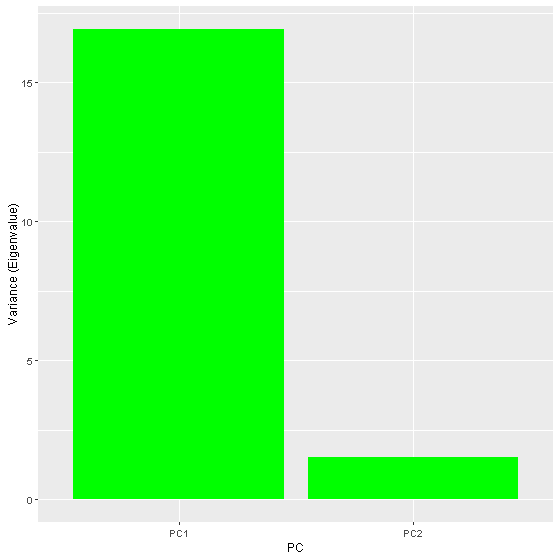

In [4]:
print("Sample Covariance Matrix:")
# Sample cov is invariant to demeaning
round(cov(df_demeaned), 4)

print("Principal Components:")
round(pca$vectors, 4)

print("Importance of Components:")
pca$importance

ggplot(data = pca$df_vars, aes(x=PC, y=var)) +
    geom_bar(stat="identity", fill="green") + ylab("Variance (Eigenvalue)")

### Standardisation


In the following, it shall be demonstrated that PCA with standardised data indeed leads to different principal components than when using data that is merely demeaned. The following plot shows the demeaned data from before on the left side and the standardised version of the same underlying data on the right. As one can see, the slope of the principal components differ across panels. The first principal component with demeaned data assigned more weight to the second variable X2, which is captured by the corresponding red line having a slope larger than one. With standardised data, the first principal component has identical factor loadings for the two variables as the differences in variance across the variables are now levelled.

This is because standardisation alters the covariance matrix while demeaning leaves is unaffected. Since the principal components are obtained as the eigenvectors of the covariance matrix, they then also differ. The covariance matrix of the standardised data is in fact the correlation matrix of the underlying data. 

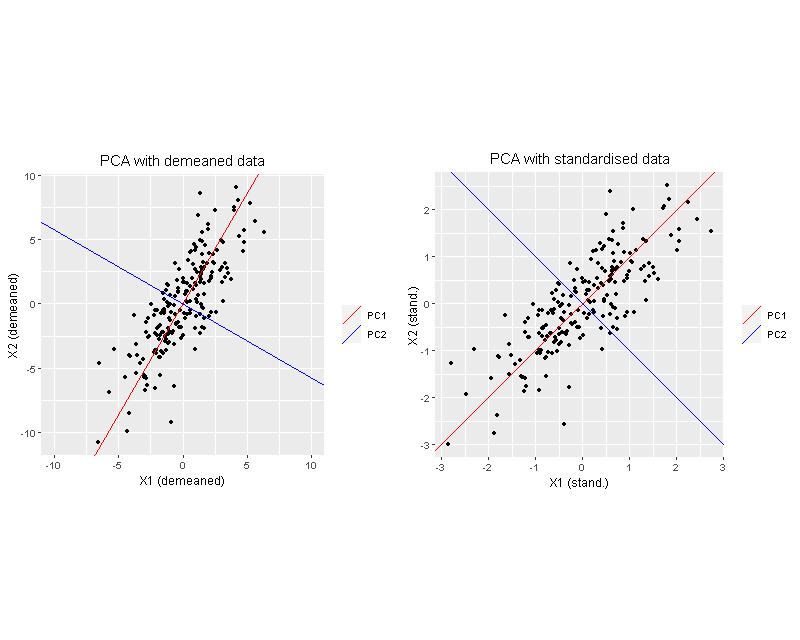

In [5]:
X_std <- scale(X, center = T, scale = T)
df_std <- as.data.frame(X_std)
pca_std <- prco(X_std)

p2 <-   ggplot(df_std, aes(X1, X2)) + 
        geom_point() + 
        geom_abline(aes(slope = pca_std$vectors[2, 1] / pca_std$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca_std$vectors[2, 2] / pca_std$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (stand.)") + ylab("X2 (stand.)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("PCA with standardised data") +
        coord_fixed()

p1 <- p1 + ggtitle("PCA with demeaned data")

options(repr.plot.width=10, repr.plot.height=8)
grid.arrange(p1, p2, nrow=1)

Below, the correlation matrix is displayed. Both variables have a high correlation of about .8 and this leads to factor loadings of the first principal component that equally weight both of the standardised variables. Still, the first component explains about 90\% of the total variance.

[1] "Sample Covariance Matrix:"


,X1,X2
X1,5.389441,6.693512
X2,6.693512,13.039028


[1] "Covariance Matrix of Standardised Data (Correlation Matrix)"


,X1,X2
X1,1.0000000,0.7984717
X2,0.7984717,1.0000000


[1] "Principal Component Loadings (standardised data):"


,PC1,PC2
X1,0.7071068,-0.7071068
X2,0.7071068,0.7071068


[1] "Importance of Principal Components (standardised data):"


,PC1,PC2
Var (Eigenval.),1.7985,0.2015
PVE,0.8992,0.1008
cPVE,0.8992,1.0000


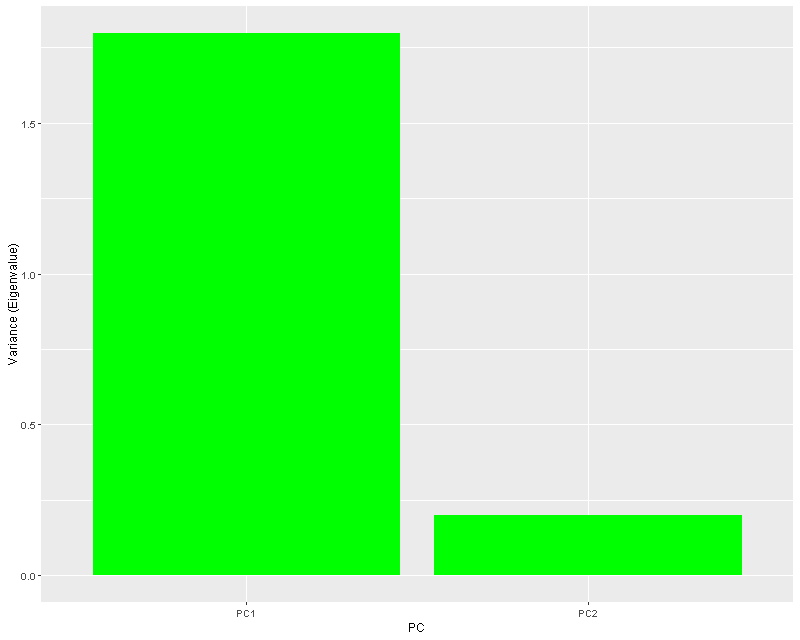

In [6]:
print("Sample Covariance Matrix:")
cov(df_demeaned)

print("Covariance Matrix of Standardised Data (Correlation Matrix)")
# Standardisation alters original Cov Matrix
cov(df_std)

print("Principal Component Loadings (standardised data):")
pca_std$vectors

print("Importance of Principal Components (standardised data):")
pca_std$importance

ggplot(data = pca_std$df_var, aes(x=PC, y=var)) +
    geom_bar(stat="identity", fill="green") + ylab("Variance (Eigenvalue)")

To illustrate this point of standardisation changing the obtained factor loadings more clearly, consider the bivariate case with uncorrelated variables and drastically differing variances. 

[1] "****************************"
[1] "*** Demeaned Data **********"
[1] "****************************"
[1] "Sample Covariance Matrix:"


,X1,X2
X1,11.43334373,-0.07325336
X2,-0.07325336,1.86232795


[1] "Principal Components:"


,PC1,PC2
X1,-0.999970715,-0.007652994
X2,0.007652994,-0.999970715


,PC1,PC2
Var (Eigenval.),11.4339,1.8618
PVE,0.8600,0.1400
cPVE,0.8600,1.0000


[1] "****************************"
[1] "*** Standardised Data ******"
[1] "****************************"
[1] "Covariance Matrix:"


,X1,X2
X1,1.00000000,-0.01587497
X2,-0.01587497,1.00000000


[1] "Principal Components:"


,PC1,PC2
X1,-0.7071068,-0.7071068
X2,0.7071068,-0.7071068


,PC1,PC2
Var (Eigenval.),1.0159,0.9841
PVE,0.5079,0.4921
cPVE,0.5079,1.0000


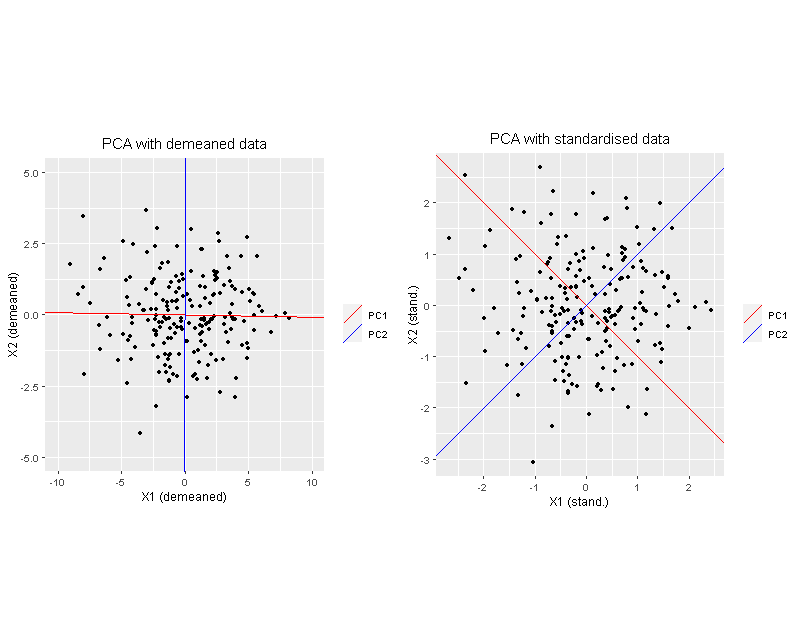

In [7]:
set.seed(1)
N <- 200
sigma <- matrix(c(12, 0, 0, 2), byrow = T, nrow = 2)
mu <- c(5, 15)

X <- rmvnorm(N, mean = mu, sigma = sigma)
colnames(X) <- c("X1", "X2")
X_demeaned <- scale(X, center=T, scale = F)

df_demeaned <- as.data.frame(X_demeaned)

print("****************************")
print("*** Demeaned Data **********")
print("****************************")
print("Sample Covariance Matrix:")
cov(df_demeaned)
print("Principal Components:")
pca <- prco(X_demeaned)
pca$vectors
pca$importance

p1 <-   ggplot(df_demeaned, aes(X1, X2)) + 
        xlim(-10, 10) + ylim(-5, 5) +
        geom_point() + 
        geom_abline(aes(slope = pca$vectors[2, 1] / pca$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca$vectors[2, 2] / pca$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (demeaned)") + ylab("X2 (demeaned)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("PCA with demeaned data") +
        coord_fixed()

print("****************************")
print("*** Standardised Data ******")
print("****************************")
X_std <- scale(X, center = T, scale = T)
df_std <- as.data.frame(X_std)
pca_std <- prco(X_std)

print("Covariance Matrix:")
cov(df_std)
print("Principal Components:")
pca_std$vectors
pca_std$importance

p2 <-   ggplot(df_std, aes(X1, X2)) + 
        geom_point() + 
        geom_abline(aes(slope = pca_std$vectors[2, 1] / pca_std$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca_std$vectors[2, 2] / pca_std$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (stand.)") + ylab("X2 (stand.)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("PCA with standardised data") +
        coord_fixed()

plot_grid(p1, p2, align = "h", nrow = 1, rel_heights = c(1, 1))

As X1 is the variable that has a much larger variance than X2 and the sample covariance between them is almost zero, the first principal component computed based on the demeaned data loads almost exclusively on X1. In other word, the first principal component is in the direction of X1, hence the red line in the left panel is essentially a flat horizontal line. About 86\% of the total variance is captured by it. In turn, the second principal component must be orthogonal which yields a vertical line. 

While the point cloud of the standardised data looks the same, the standardisation procedure takes out the difference in variance: the newly generated variables have both a variance of 1. Since the correlation between the variables is almost zero, it follows that the factor loadings of the first principal component obtained with standardised data assign almost equal weight to both of the standardised variables.

Thus, in the case of the covariance matrix approach, variables with a high variance will dominate the first principal component and one should be aware of this issue. For instance, it would actually matter whether length is measured in miles or in kilometres as this has implications for the variance of the measurements. With explanatory variables that are measured on different scales, it is therefore crucial to standardise in order to achieve scale invariance. However, one might be inclined to always standardise the variables, even if they are measured on the same scale, just to be precautious. However, the differences in variance may in fact be relevant and those high-variance variables might be more important when predicting the outcome. Hence, it is necessary to study the role of PCA in a regression context rather than as a tool for exploratory data analyses.

### Principal Component Regression (PCR)

To demonstrate the general procedure, consider the following set-up. We always draw a test and a training data set of equal size $N$. The explanatory variables are obtained as draws from a multivariate normal distribution. As the data is in any case demeaned, the means hardly matter. By contrast, the choice of the underlying covariance matrix is crucial. To ensure randomness of the covariance matrix it is constructed as follows:

First, we create a matrix $W$ that has dimensions $p \times p$ and its elements are all drawn from a standard normal distribution. As this matrix is not of full rank and we aim to obtain a covariance matrix that is positive semi-definite and of full rank, further manipulation is necessary: $ \Sigma = W W^T + D$ where $D$ is a random diagonal matrix with only positive entries on the diagonal, which is ensured by drawing the diagonal from the standard uniform distribution. 

In the following, we consider the case of $N=500$ and $P = 20$.


In [8]:
gen_x <- function(N, mu) {
  
  p <- length(mu) # number of predictors
  
  W = replicate(p, rnorm(p))
  sigma = W%*%t(W) + diag(runif(p),nrow=p)
  
  X_train <- rmvnorm(n=N, mean=mu, sigma=sigma)  # randomly draw training data set
  X_test <- rmvnorm(n=N, mean=mu, sigma=sigma)  # randomly draw test data set
  
  return(list(X_train=X_train, X_test = X_test, sigma = sigma))   
}

In [9]:
gen_y <- function(intercept, effects, X_train, X_test, sigma_x, PC, random, eps_sd) {
  p <- dim(sigma_x)[1]
  N_train <- dim(X_train)[1]
  N_test <- dim(X_test)[1]
  
  if (random == 1) {

    beta_vec <- sample(effects, size= p, replace=T)
    y_train <- rep(intercept, N_train) + X_train %*% beta_vec + rnorm(n=N_train, mean=0, sd=eps_sd)
    y_test <- rep(intercept, N_test) + X_test %*% beta_vec + rnorm(n=N_test, mean=0, sd=eps_sd)
  
  } else {
    stopifnot(length(effects) == length(PC))
    V <- eigen(sigma_x)$vectors[,PC]
    y_train <- rep(intercept, N_train) + X_train %*% V %*% effects + rnorm(n=N_train, mean=0, sd=eps_sd)
    y_test <- rep(intercept, N_test) + X_test %*% V %*% effects + rnorm(n=N_test, mean=0, sd=eps_sd)
  }
  return(list(y_train = y_train, y_test = y_test)) 
}

In [10]:
pcr_cv <- function(X, Y, k) {
  
  stopifnot(nrow(Y) == nrow(X))
  
  data <- cbind(Y, X)
  
  fold_i <- sample(rep(1:k, length.out = nrow(X)))
  
  mse <- matrix(NA, nrow=ncol(X), ncol=k)
  
  for (x in 1:k) {
    val_i <- which(fold_i == x)
    train <- data[-val_i,]
    val <- data[val_i,]
    
    pca <- prco(train[,-1])
    
    for (j in 1:ncol(X)) {
      Z_train <- cbind(rep(1, nrow(train)),train[,-1] %*% pca$vectors[,1:j])
      Z_val <- cbind(rep(1, nrow(val)),val[,-1] %*% pca$vectors[,1:j])
      
      beta_hat <- solve(t(Z_train)%*%Z_train) %*% t(Z_train) %*% train[,1]
      mse[j, x] <- mean((Z_val %*% beta_hat - val[,1]) ** 2)
    }
  }
  
  mse_cv <- cbind(1:ncol(X), rowMeans(mse))
  colnames(mse_cv) <- c("M", "CV-MSE")
  
  M <- match(min(mse_cv[,"CV-MSE"]), mse_cv[,"CV-MSE"])
  pca_full_train <- prco(X)
  cv_vectors <- pca_full_train$vectors[,1:M]
  
  Z <- cbind(rep(1, nrow(X)),X %*% cv_vectors)
  beta_hat <- solve(t(Z)%*%Z) %*% t(Z) %*% Y
  mse_train <- mean((Z %*% beta_hat - Y) ** 2)
  
  importance <- pca_full_train$importance[,1:M]
  
  return(list(mse_cv = mse_cv, mse_train = mse_train, beta_hat = beta_hat, M=M, cv_vectors=cv_vectors, importance=importance))
}

In [11]:
pcr_comp <- function(X, Y, M) {
    pca <- prco(X)
    Z <- cbind(rep(1, nrow(X)),X %*% pca$vectors[,1:M])
    beta_hat <- solve(t(Z)%*%Z) %*% t(Z) %*% Y
    mse_train <- mean((Z %*% beta_hat - Y) ** 2)
    
    importance <- pca$importance[,1:M]
    
    return(list(mse_train = mse_train, beta_hat = beta_hat, vectors=pca$vectors[,1:M], importance=importance))
}

In [12]:
N <- 500
p <- 20
set.seed(3)
X <- gen_x(N = N, sample(10:20, p, replace = T))
X_train_d <- scale(X$X_train, center = T, scale = F)
X_test_d <- scale(X$X_test, center = T, scale = F)

y  <- gen_y(intercept=2, effects=rep(2, 5), X_train = X$X_train, X_test = X$X_test, sigma_x=X$sigma, PC = c(1, 2, 3, 4, 5),random = 0, eps_sd=1) 

y_train <- y$y_train
y_test <- y$y_test

pca <- prco(X_train_d)

In the case of "unsupervised learning", the number of principal components to include would be determined without regard to the outcome variable $Y$. Thus, the previously discussed ad-hoc approaches are considered. Consistently, they would suggest $M=10$, so to include the principal components up to number 10. This is the one where arguably an *elbow* is identifiable from the Scree Plot and where the cumulative PVE reaches 90\%. Also, this would be the last component larger than $0.7 \bar{\lambda}$.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Var (Eigenval.),66.7512,60.5089,52.9347,44.2527,42.6050,36.2178,32.1428,20.4739,16.7488,16.0852,10.9944,9.2573,5.5978,4.5052,3.6399,2.6003,1.6471,0.8152,0.7556,0.4647
PVE,0.1556,0.1410,0.1234,0.1032,0.0993,0.0844,0.0749,0.0477,0.0390,0.0375,0.0256,0.0216,0.0130,0.0105,0.0085,0.0061,0.0038,0.0019,0.0018,0.0011
cPVE,0.1556,0.2966,0.4200,0.5232,0.6225,0.7069,0.7819,0.8296,0.8686,0.9061,0.9317,0.9533,0.9664,0.9769,0.9854,0.9914,0.9953,0.9972,0.9989,1.0000


[1] "Mean Eigenvalue (Variance)"
[1] 21.44993
[1] "0.7 * (Mean Eigenvalue)"
[1] 15.01495


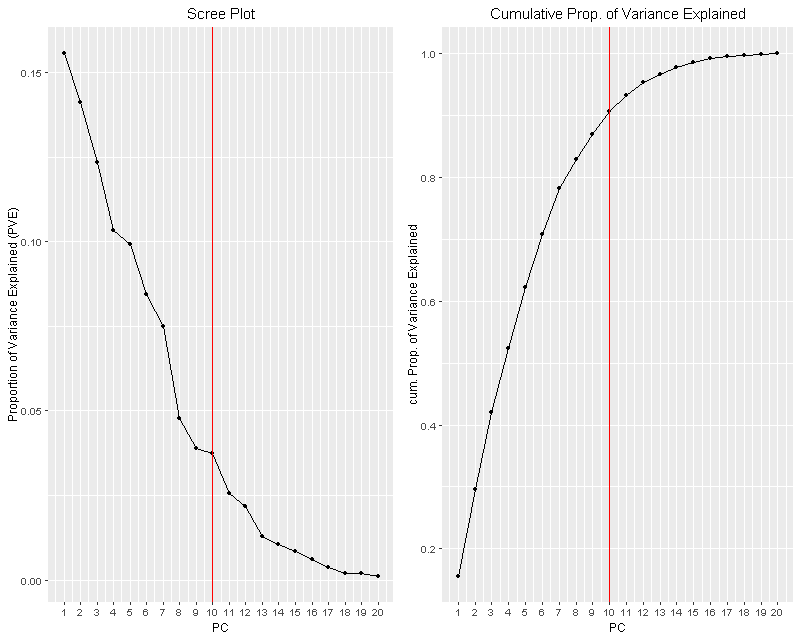

In [13]:
PVE <- pca$importance["PVE",]
cPVE <- pca$importance["cPVE",]
PC <- 1:p

p1 <- ggplot(data.frame(PC, PVE), aes(x = PC, y = PVE)) + 
      theme(plot.title = element_text(hjust = 0.5)) +
      geom_point() + geom_line() + ylab("Proportion of Variance Explained (PVE)") +
      geom_vline(xintercept = 10, color="red") +
      ggtitle("Scree Plot") + scale_x_continuous(breaks = 1:p)

p2 <- ggplot(data.frame(PC, cPVE), aes(x = PC, y = cPVE)) + 
      theme(plot.title = element_text(hjust = 0.5)) +
      geom_point() + geom_line() + ylab("cum. Prop. of Variance Explained") +
      geom_vline(xintercept = 10, color="red") +
      ggtitle("Cumulative Prop. of Variance Explained") + scale_x_continuous(breaks = 1:p) + scale_y_continuous(breaks = seq(0,1, by = 0.2))

plot_grid(p1, p2, align = "h", nrow = 1, rel_heights = c(1, 1))

pca$importance
print("Mean Eigenvalue (Variance)")
print(mean(pca$values))
print("0.7 * (Mean Eigenvalue)")
print(0.7 * mean(pca$values))

Again, note that these approaches select $M$ without any consideration for $Y$ and only based on the assumption, that the most relevant statistical information is captured by the first couple of principal components which encapsulate a reasonably large farction of the roiginal variability. 

The benefit of simulated data is now that the the relationship of the explanatory variables with $Y$ can directly be controlled. Threfore, consider the following way of generating $Y$. Suppose we relate $Y$ to the demeaned (or standardised) variables $\tilde{X}$:

$$ Y = \tilde{\pmb X} \beta + \epsilon \text{ ,}$$

note that the statistical inference is not affected by demeaning or standardisation the explanatory variables as the estimates are simply adjusted accrodingly. As the matrix of all principal components (eigenvectors), $\pmb \phi$, is an orthogonal matrix which implies that the inverse of it is identical to its transposed, so $ \pmb \phi^T = \pmb \phi ^{-1}$, hence: $\pmb \phi \pmb \phi^T = \pmb I = \pmb \phi^T \pmb \phi$. Thus, the structural equation can be re-written:

$$ Y = \tilde{\pmb X} \pmb \phi \pmb \phi^T + \epsilon$$

and substituting $ \pmb Z = \tilde{\pmb X} \pmb \phi $ yields

$$ Y = \pmb Z \theta + \epsilon \text{ ,} $$

where $\theta = \pmb \phi^T \beta$. Now assume, that $\beta$ is only in the direction of the $j$-th eigenvector $\phi_j$, which is $\phi_j = \alpha \beta$ with the scalar $\alpha \neq 0$. Hence, $\theta_j = \phi_j^T \beta = \alpha \beta^T \beta$ and $\theta_{j \, '} = \phi_{j \, '}^T \beta = 0$ for $j \neq j \, '$. Thus, the outcome is fully determined by the principal component $Z_j$:

$$ Y = \theta_j Z_j + \epsilon = \theta_j \tilde{\pmb X} \phi_j + \epsilon \text{ .}$$

The other principal components do not affect the outcome at all as their coefficients are set to zero. This reasoning can be extended to allow the outcome $Y$ to be determined by two or more principal components.

For the simulation this implies the following. Based on the "true" underlying covariance matrix $\Sigma$, which is randomly generated, the "true" eigenvectors can be extracted. However, it is not necessarily the case that these "true" eigenvectors also match the empirically obtained principal components loadings as the random sampling of the explanatory variables from a multivariate normal distribution induces *noise*.

[1] "Number of Principal Components chosen by CV:"


[1] 15

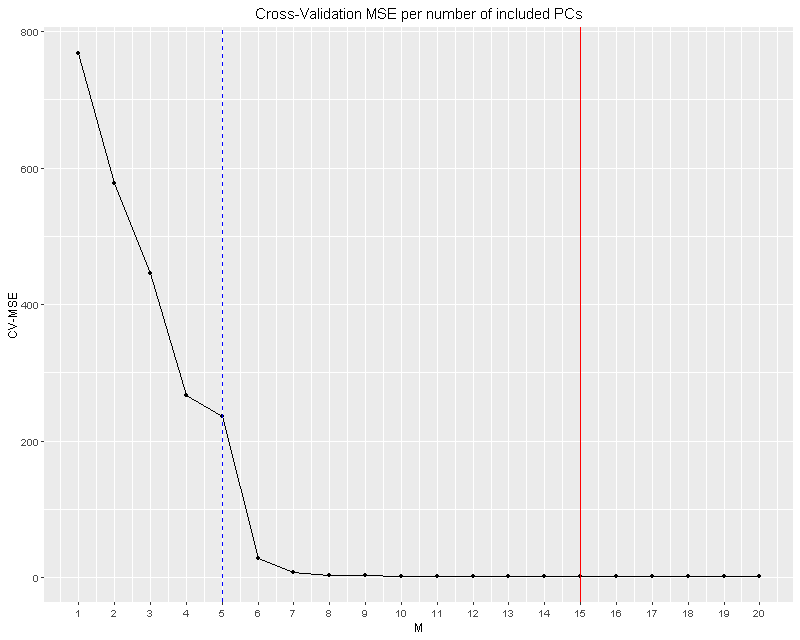

In [14]:
set.seed(12)
pcr <- pcr_cv(X=X_train_d, Y=y_train, k=10)

print("Number of Principal Components chosen by CV:")
pcr$M
data <- data.frame(pcr$mse_cv)

ggplot(data, aes(x = M, y = CV.MSE)) + 
      theme(plot.title = element_text(hjust = 0.5)) +
      geom_point() + geom_line() + ylab("CV-MSE") + geom_vline(xintercept = pcr$M, color="red") +
      geom_vline(xintercept = 5, color="blue", linetype="dashed") +
      ggtitle("Cross-Validation MSE per number of included PCs") + scale_x_continuous(breaks = 1:20)

The minimal CV-MSE based on 10-fold CV is obtained for $M=15$ and thus way more principal components are included as justified based on the true data generating process, where the outcome $Y$ was related only to the first 5 eigenvectors of the "true" covariance matrix. This is also larger as the number of principal components suggested by the ad-hoc approaches - but as already discussed, they are dervied without any regard for the outcome variable. It has to be emphasized that taking the minimum criterion with respect to the CV-MSE leaves room for some random interferences. As can be seen from the plot, after the 6th PC the CV-MSE is essentially flat, i.e. the additional principal components included do not improve the fit. However, just by chance it may occur that an additional PC picks up on some random noise which results in a *slightly* better performance. This explains why taking the absolute minimum based on CV may not be reasonable. Instead, it is very much suggested to plot the CV-MSE and identify the appropriate number of principal components to include using eyeballing. In this case, it would probably lead to including 7 or 8 PCs rather than 15, achieving a larger degree of dimensionality reduction.

But why is the CV-MSE still distinctly higher with 5 principal compnents than with 6, although the data generating process of $Y$ is based on 5 eigenvectors? While also the CV-procedure also induces some randomness when randomly splitting the training sample into $k$ folds, this can rather be explained by the noise introduced in the sampling process when randomly drawing the explanatory variables from the multivariate normal distribution, as already pointed to above. To illustrate this, we repeat the same procedure with the only modification of choosing $N = 50.000$ instead of $N = 500$.

[1] "Number of Principal Components chosen by CV:"


[1] 18

M,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000,11.000,12.0000,13.000,14.0000,15.0000,16.0000,17.0000,18.0000,19.0000,20.0000
CV-MSE,756.5056,602.9194,347.9348,144.8953,4.1426,1.0329,1.0142,1.0093,1.0051,1.0041,1.003,1.0021,1.002,1.0018,1.0018,1.0015,1.0015,1.0015,1.0016,1.0016


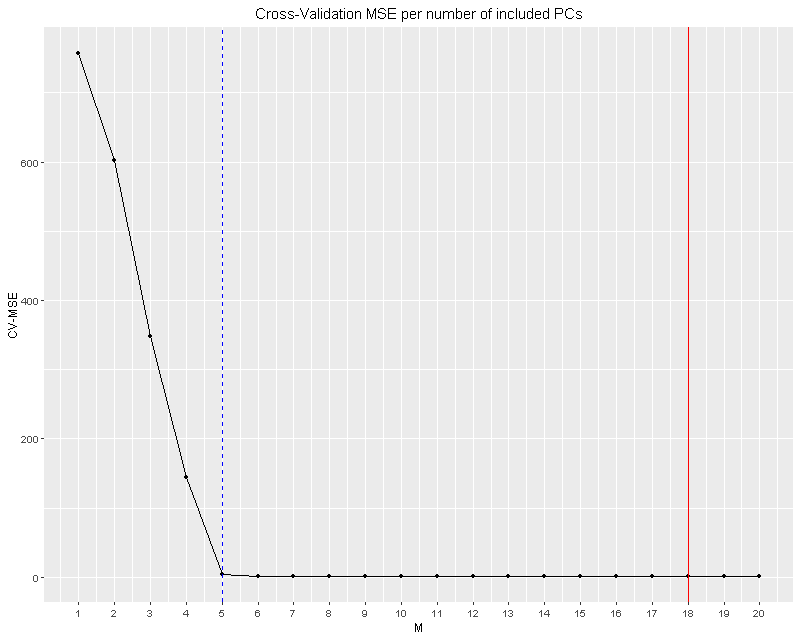

In [15]:
N_l <- 50000
set.seed(3)
X_l <- gen_x(N = N_l, sample(10:20, p, replace = T))
X_l_train_d <- scale(X_l$X_train, center = T, scale = F)
X_l_test_d <- scale(X_l$X_test, center = T, scale = F)

y_l  <- gen_y(intercept=2, effects=rep(2, 5), X_train = X_l$X_train, X_test = X_l$X_test, sigma_x=X_l$sigma, PC = c(1, 2, 3, 4, 5),random = 0, eps_sd=1) 
y_l_train <- y_l$y_train

pcr_l <- pcr_cv(X=X_l_train_d, Y=y_l_train, k=10)

print("Number of Principal Components chosen by CV:")
pcr_l$M
data <- data.frame(pcr_l$mse_cv)
round(t(pcr_l$mse_cv),4)

ggplot(data, aes(x = M, y = CV.MSE)) + 
      theme(plot.title = element_text(hjust = 0.5)) +
      geom_point() + geom_line() + ylab("CV-MSE") + geom_vline(xintercept = pcr_l$M, color="red") +
      geom_vline(xintercept = 5, color="blue", linetype="dashed") +
      ggtitle("Cross-Validation MSE per number of included PCs") + scale_x_continuous(breaks = 1:20)

Visually, the CV-MSE starts becoming a flat horizontal line when the "true" number of principal components is reached at $M = 5$. With such sample sizes, eyeballing the CV-MSE might be more likely to identify the "appropriate" number of principal components to include. The minimum criterion, however, would probably not ensure this: in this case, $M=18$ would be chosen. But even in this case, the CV-MSE with 6 principal components is distincly smaller than the CV-MSE with 5 principal components. With this sample size, the situation improves, but still, the empirically obtained principal components do not exactly resemble the "true" eigenvectors used when generating $Y$.

Returning to the case with $N = 500$, it is now time to compare the performance on the held-out test data set. Therefore, we compare the Test-MSE of OLS to the one obtained with CV (i.e. with 15 principal components). Additionally, the Test-MSEs are displayed when including up to the 20th principal component.

In [16]:
# OLS
X_t <- cbind(rep(1, nrow(X$X_train)), X$X_train)
beta_ols <- solve(t(X_t) %*% X_t) %*% t(X_t) %*% y_train
mse_train_ols <- mean((cbind(rep(1, nrow(X$X_train)), X$X_train) %*% beta_ols - y_train)**2)
mse_test_ols <- mean((cbind(rep(1, nrow(X$X_test)), X$X_test) %*% beta_ols - y_test)**2)

# PCR with 15 PCs (CV solution)
Z <- cbind(rep(1, nrow(X$X_test)),X_test_d  %*% pcr$cv_vectors)
mse_test_pcrCV <- mean((Z %*% pcr$beta_hat - y_test) ** 2)

res1 <- matrix(c(mse_test_ols, mse_test_pcrCV), nrow = 1)
colnames(res1) <- c("Test-MSE OLS", "Test-MSE PCR/CV")

# Test MSEs for M= 1 , ..., 20
mse_m <- matrix(NA, ncol=20, nrow=2)
for (m in 1:20) {
    pcr_m <- pcr_comp(X = X_train_d, Y=y_train, M=m)
    Z <- cbind(rep(1, nrow(X$X_test)),X_test_d  %*% pcr_m$vectors)
    mse_m[1, m] <- m
    mse_m[2, m] <- mean((Z %*% pcr_m$beta_hat - y_test) ** 2) 
}

rownames(mse_m) <- c("M", "Test-MSE")

round(res1, 4)
round(mse_m, 4)

print("Training-MSE OLS:")
mse_train_ols
print("Training-MSE with M=20:")
pcr_comp(X = X_train_d, Y=y_train, M=20)$mse_train


Test-MSE OLS,Test-MSE PCR/CV
1.0496,3.4815


M,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.000,10.000,11.0000,12.0000,13.0000,14.0000,15.0000,16.0000,17.0000,18.0000,19.0000,20.0000
Test-MSE,696.1666,540.7817,411.3105,225.6567,225.6705,26.0683,8.1784,4.4375,4.438,4.049,3.5874,3.5134,3.5129,3.5117,3.4815,3.4856,3.4801,3.4804,3.4784,3.4742


[1] "Training-MSE OLS:"


[1] 1.035292

[1] "Training-MSE with M=20:"


[1] 1.035292

Clearly, the OLS Test-MSE performs better than any Principal Component Regression. Notably, even PCR with $M=20$, i.e. no dimensionality reduction, yields a higher Test-MSE than OLS. This casts doubts about the reliability of the employed functions. However, both yield the same MSE when being applied to the training data, so there does not seem to be a mistake in the functions.

This result could be due to the fact that $P << N$ anyway as $N=500$ and $P=20$, so *overfitting* is likely not to be an issue. Therefore, it is worth investigating this more thoroughly in a short simulating study featuring situations with different relations of $M$ to $P$.

In [17]:
sim_func <- function(N, P, intercept, effects, PC, random_effects, eps_sd, k, M_true) {
  X <- gen_x(N = N, sample(10:20, size=P, replace = T))
  X_train_d <- scale(X$X_train, center = T, scale = F)
  X_test_d <- scale(X$X_test, center = T, scale = F)
  
  y  <- gen_y(intercept=intercept, effects=effects, PC = PC,random = random_effects, eps_sd=eps_sd, X_train = X$X_train, X_test = X$X_test, sigma_x=X$sigma) 
  y_train <- y$y_train
  y_test <- y$y_test
  
  # PCR / CV
  pcr <- pcr_cv(X=X_train_d, Y=y_train, k=k)
  Z <- cbind(rep(1, nrow(X$X_test)),X_test_d  %*% pcr$cv_vectors)
  mse_test_pcr <- mean((Z %*% pcr$beta_hat - y_test) ** 2)

  # OLS  
  X_t <- cbind(rep(1, nrow(X$X_test)), X$X_train)
  beta_ols <- solve(t(X_t) %*% X_t) %*% t(X_t) %*% y_train
  mse_test_ols <- mean((cbind(rep(1, nrow(X$X_test)), X$X_test) %*% beta_ols - y_test) ** 2)
  
  return(list(mse_test_ols = mse_test_ols, mse_test_pcr = mse_test_pcr,  M = pcr$M))
}

In [18]:
reps <- 30
res <- matrix(NA, nrow=9, ncol=4)
colnames(res) <- c("N","MSE_OLS", "MSE_PCR", "selected M (CV)")

x <- 30
for (n in seq(100, 500, by=50)) {
  simulation <-
    replicate(reps, sim_func(
      N = n, 
      P = 75, 
      intercept= 0, 
      effects = sample(5:10, size=5, replace=T), 
      PC = 1:5, 
      random_effects = 0, 
      eps_sd = 1, 
      k = 5))
  
  sim <-  mapply(simulation, FUN = as.numeric)
  sim <- matrix(data = sim, ncol = reps)
  mean_values <- rowMeans(sim)
  
  res[x, 1] <- n
  res[x, 2] <- mean_values[1]
  res[x, 3] <- mean_values[2]
  res[x, 4] <- mean_values[3]

  x <- x + 1 
}

print(res)

ERROR: Error in `[<-`(`*tmp*`, x, 1, value = n): Indizierung außerhalb der Grenzen


But even with $P=75$ and $N$ starting from 100, the OLS Test-MSE clearly dominates the Test-MSE of PCR with the number of components chosen by CV. As already discussed above, the CV approach based on the absolute minimum of the CV-MSE yields only a slight dimensionality reduction as still more than 70 principal components are retained on average over the 30 replications of this simulation study. So even in this situation deemed suitable for the PCR, it performs way worse than the OLS approach.

## Asset Index as Empirical Application

So far, we discussed the motivation for using Principal Component Analysis, its properties and its usage in the regression context. This section aims to illustrate a way that PCA is currently utilised in economics, specifically in development economics. Essentially, PCA is used to construct a proxy variable of something that is either generally unoberservable or not just not elicited in a survey.

The problem motivating the use of PCA can be described as follows. Development economists are often interested in the economic status of a household - for instance, in order to study the extent to which economic inequality prevails or in order to relate household welfare to another variable such as educational outcomes of children (e.g. McKenzie, 2005, or Filmer/Pritchett, 2001). It seems natural to use household income or consumption expenditure as measures of the economic status of a household. However, in the development context there are two issues that render this impossible in many cases. First, survey data collected in developing countries often goes along with reporting errors that render the usage of income or consumption data infeasible. Second, and even more fundamental, surveys conducted in developing countries commonly do not even contain questions with respect to those aspects. One example is the Demographic and Health Survey (DHS): conducted in a broad range of developing countries with a nationally-representative sample of households, these data are frequently used in development studies but do not generally contain information on household consumption expenditure or income.

However, those survey data usually include information regarding an household's ownership of certain assets, such as a bicycle or a refrigerator, or with respect to housing standards, e.g. the materials used for housing construction. Therefore, the idea is to utilise those survey items in order to construct a proxy variable for household wealth. 





Motivation:

- survey data collected in developing countries often does not contain information on hh's income or consumption expenditures
    - see Demographic and Health Survey (DHS): conducted in broad range of developing countries, "nationally-representative household surveys that provide data for a wide range of monitoring and impact evaluation indicators in the areas of population, health, and nutrition", frequently used in development studies
    - generally no information on income or expenditures, therefore a wealth index is constructed as "a composite measure of a household's cumulative living standard", "using easy-to-collect data on a household's ownership of selected assets, such as televisions and bicycles; materials used for housing construction; and types of water access and sanitation facilities. 
    
Aim:

- Construct "asset index" to proxy for "a household's long-run economic status" (Filmer/Pritchett 2001)
    - constructed usually from data on asset ownership or housing characteristics (e.g. Filmer/Pritchett 2001)
    
Choosing appropriate weights?

- equal weights (simply sum over the variables in the case of Dummy variables) has the "appeal of simplicity" but this "masks the fact that the imposition of numeric equality is completely arbitrary" (Filmer/Pritchett 2001)
- "simply adding all asset variables separately in a linear regression would implicitly create weights", but most assets may exert both an indirect (as a proxy of wealth) but also a direct effect, thus it is not possible to isolate the effect of an increase in wealth (Filmer/Pritchett 2001)

Standardization of variables. Based on the index, build percentiles: bottom 40% poor, upper 20% rich

Crucial assumption:

- hh's "long-run wealth explains the maximum variance (and covariance) in the asset variables", "no way to test this assumption directly" (Filmer/Pritchett 2001)
- "internal/external coherence" (Filmer/Pritchett 2001):
    - internal coherence: "poor" should have lower mean of assets associated with high wealth and high means for assets associated with low wealth
    - external coherence: comparison across Indian states using state-level poverty rates
- compare with consumption expenditures, when both available in the survey (Filmer/Pritchett 2001)
    
    
    

Interpretation:

- in case of dummy variables: change from 0 to 1

Factor Analysis:

- Filmer/Pritchett (2001): list FA as alternative approach and state that the ranks derived under both approaches has 0.988 Spearman rank correlation




In [ ]:
taste1 <- c(rep(1, 10), rep(0, 10))
wealth1 <- c(0, 0, rep(1, 8), 0, 0, rep(1, 8))
sit1 <- cbind(wealth1, taste1)
df1 <- as.data.frame(sit1)
df1

In [ ]:
library(ggplot2)
ggplot(df1, aes(wealth1, taste1)) +
  geom_point(position = position_jitter(w = 0.01, h = 0.01))

In [ ]:
cov(sit1)

In [ ]:
prcomp(sit1, center=TRUE)

In [ ]:
draw_w <- runif(2000, min = 0, max = 1)
w <- as.integer(draw_w > 4/20)
mean(w)

In [ ]:
draw_t <- runif(2000, min=0, max=1)
t <- as.integer(draw_t > 0.5)
mean(t)

In [ ]:
x <- cbind(w, t)
cov(x)

In [ ]:
prcomp(x, center=TRUE)